In [ ]:
import pandas as pd



# this only pulls the first 1000 rows. if you want the whole dataset take out the nrows = 1000
data=pd.read_csv('311_Service_Requests_from_2010_to_Present.tsv',delimiter='\t',encoding='utf-8-sig',low_memory=False, index_col  = 'Unique Key')
#we will use sample() function to select a random sample of size equivalent to 15% of the size of the dataset
df1 = data.sample(frac =.15, replace=True)

#print(list(df.columns.values)) #file header
df.tail(1) #last N rows


In [ ]:
df2 = df1.copy()
df2.to_csv(r'C:\Users\faris\311_sample.csv')

In [1]:
import pandas as pd
df = pd.read_csv('311_sample.csv')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.shape

(382355, 41)

In [3]:
#df['just_date'] = df['Created Date'].dt.date
df['just_time'] = pd.to_datetime(df['Created Date']).dt.strftime('%H:%M:%S')
df['just_close'] = pd.to_datetime(df['Closed Date'])
df['just_open'] = pd.to_datetime(df['Created Date'])
df['day of the week Open'] =  df['just_open'].dt.day_name()
df['day of the week close'] =  df['just_close'].dt.day_name()
df['Days to Close a Complaint' ] = -(df["just_open"] - df["just_close"]).astype("timedelta64[D]")

df.dtypes
#df.tail(10)

Unique Key                                 int64
Created Date                              object
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [14]:
df['Month_open'] = df['just_open'].dt.month

In [15]:
import calendar #https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
df['Month_open'] = df['Month_open'].apply(lambda x: calendar.month_abbr[x])

In [16]:
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,just_time,just_close,just_open,day of the week Open,day of the week close,Month_open
0,40955843,11/16/2018 10:38:06 PM,11/20/2018 02:07:48 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10451,960 GRAND CONCOURSE,...,NaN,40.829304,-73.921346,"(40.82930449373355, -73.9213457943975)",22:38:06,2018-11-20 02:07:48,2018-11-16 22:38:06,Friday,Tuesday,Nov
1,43346984,07/22/2019 02:28:34 AM,07/22/2019 09:10:37 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10451,299 EAST 158 STREET,...,NaN,40.823165,-73.917610,"(40.82316469920969, -73.91760985037008)",02:28:34,2019-07-22 21:10:37,2019-07-22 02:28:34,Monday,Monday,Jul
2,42059386,03/26/2019 09:36:43 PM,03/27/2019 09:18:23 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10016,139 EAST 27 STREET,...,NaN,40.741938,-73.982678,"(40.74193771952419, -73.98267813378038)",21:36:43,2019-03-27 21:18:23,2019-03-26 21:36:43,Tuesday,Wednesday,Mar
3,43246439,07/10/2019 04:05:51 AM,07/10/2019 10:03:05 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11354,33-43 UNION STREET,...,NaN,40.767053,-73.827254,"(40.76705294652145, -73.82725380778191)",04:05:51,2019-07-10 10:03:05,2019-07-10 04:05:51,Wednesday,Wednesday,Jul
4,42920377,06/09/2019 06:34:13 PM,06/09/2019 07:14:25 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10469,3226 FENTON AVENUE,...,NaN,40.873051,-73.846312,"(40.873050912369045, -73.84631234950255)",18:34:13,2019-06-09 19:14:25,2019-06-09 18:34:13,Sunday,Sunday,Jun


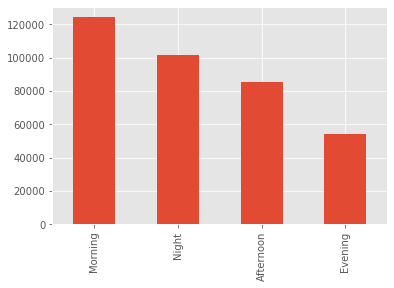

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#part of day for calling and making a 311 requst
df_close = df['just_close']
#print (df)
#
df_close_cut=pd.cut(df_close.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
#
df['Part of day close'] =  df_open_cut
df_close_cut.value_counts().plot.bar()

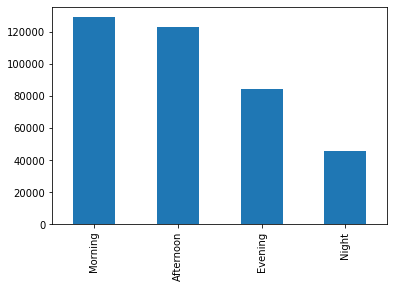

In [60]:
#part of day for calling and making a 311 requst
df_open = df['just_open']
#print (df)
#
df_open_cut=pd.cut(df_open.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
#
df['Part of day open'] =  df_open_cut
df_open_cut.value_counts().plot.bar()

In [25]:
df_open_cut.value_counts()

Morning      129200
Afternoon    122913
Evening       84742
Night         45500
Name: just_open, dtype: int64

In [29]:
df_close_cut.value_counts()

Morning      124286
Night        101482
Afternoon     85749
Evening       54278
Name: just_close, dtype: int64

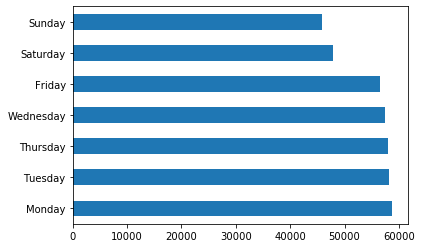

In [6]:
df['day of the week Open'].value_counts().plot.barh()


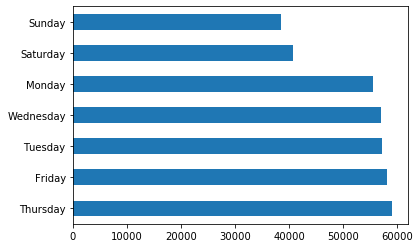

In [7]:
df['day of the week close'].value_counts().plot.barh()

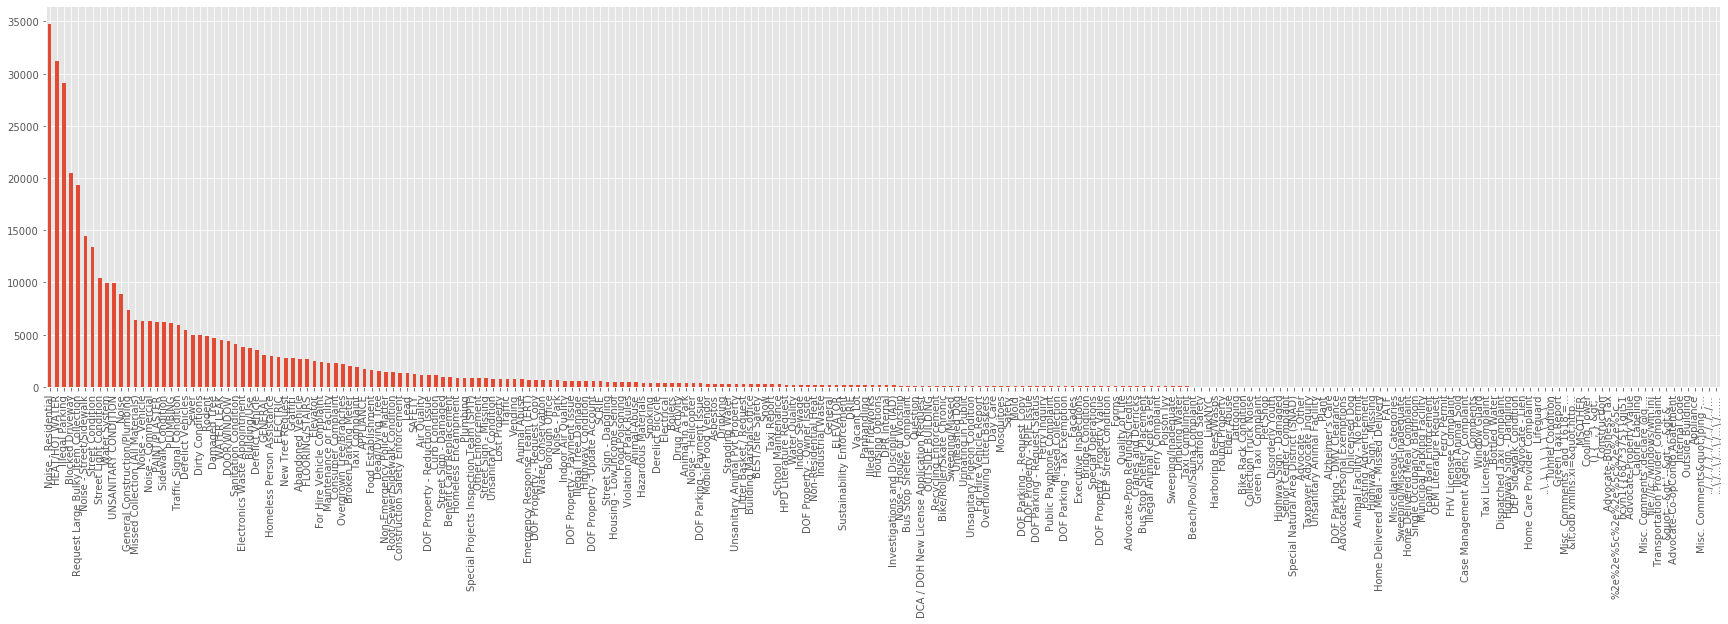

In [38]:
Count = pd.value_counts(df['Complaint Type'].values, sort=True)


Count.plot.bar( figsize=(30,7), rot = 90)

In [27]:
#df['Days to Close a Complaint' ] = -(df["just_open"] - df["just_close"]).astype("timedelta64[D]")
df['Days to Close a Complaint' ].describe()

count    365795.000000
mean          8.437513
std          21.194896
min         -54.000000
25%           1.000000
50%           1.000000
75%           5.000000
max         370.000000
Name: Days to Close a Complaint, dtype: float64

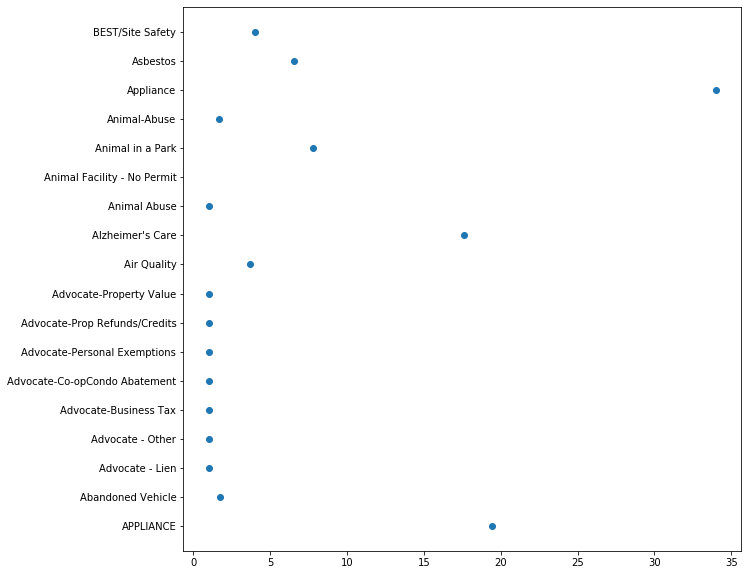

In [52]:
import matplotlib.pyplot as plt

plt_scatter = df['Days to Close a Complaint' ].groupby(df['Complaint Type' ]).mean().head(25)
plt.figure(figsize=(10, 10))
plt.scatter(plt_scatter, plt_scatter.index)



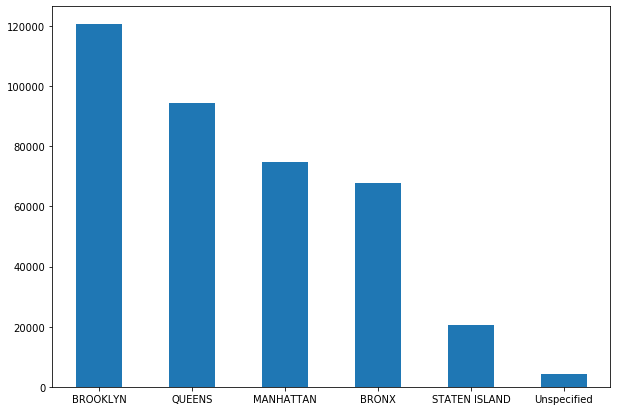

In [17]:
df['Borough'].value_counts().plot.bar( figsize=(10,7), rot = 0)
# Who has the most complaint in nyc

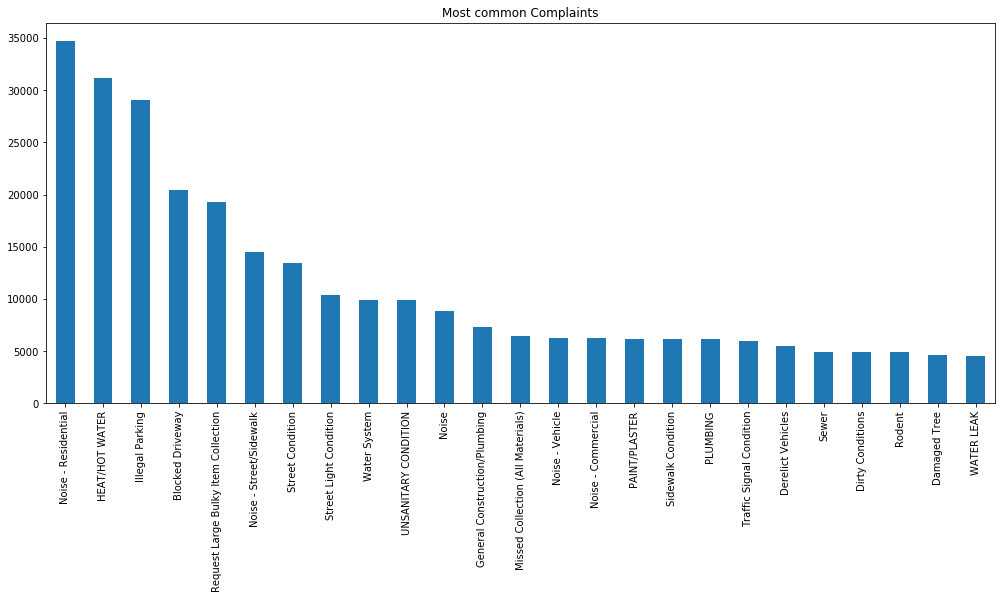

In [23]:
df['Complaint Type'].value_counts().head(25).plot(kind='bar',
                    figsize=(17,7), title = 'Most common Complaints')

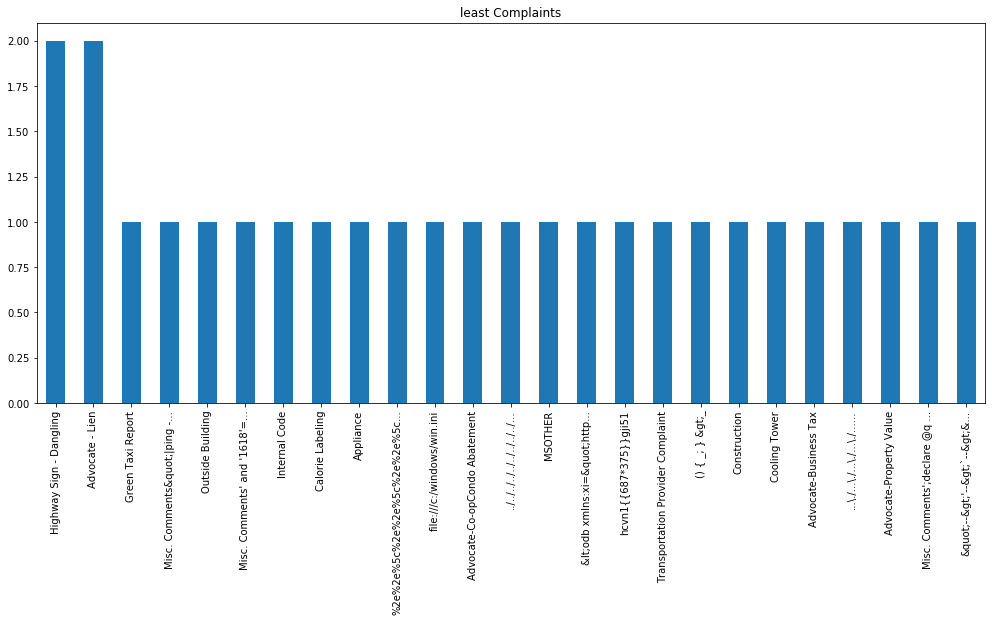

In [25]:
df['Complaint Type'].value_counts().tail(25).plot(kind='bar',
                    figsize=(17,7), title = 'least Complaints')

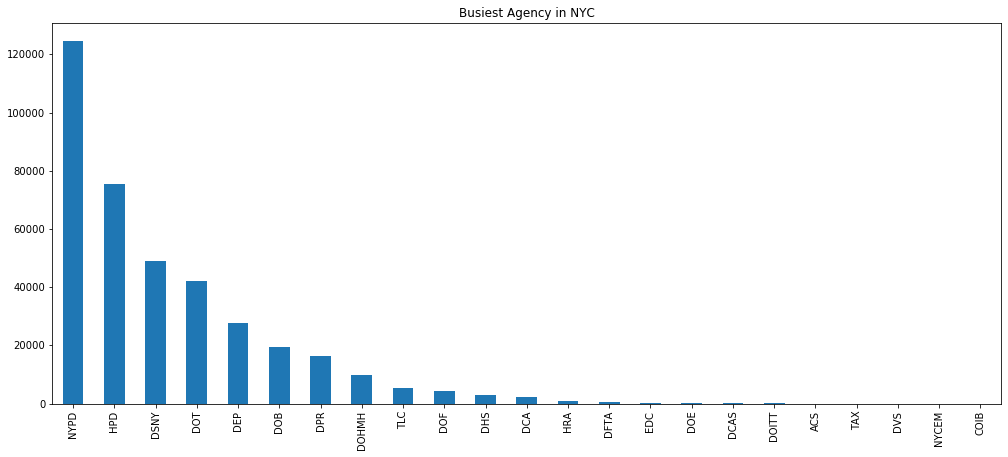

In [45]:
df['Agency'].value_counts().plot(kind='bar',
                    figsize=(17,7), title = 'Busiest Agencys in NYC')

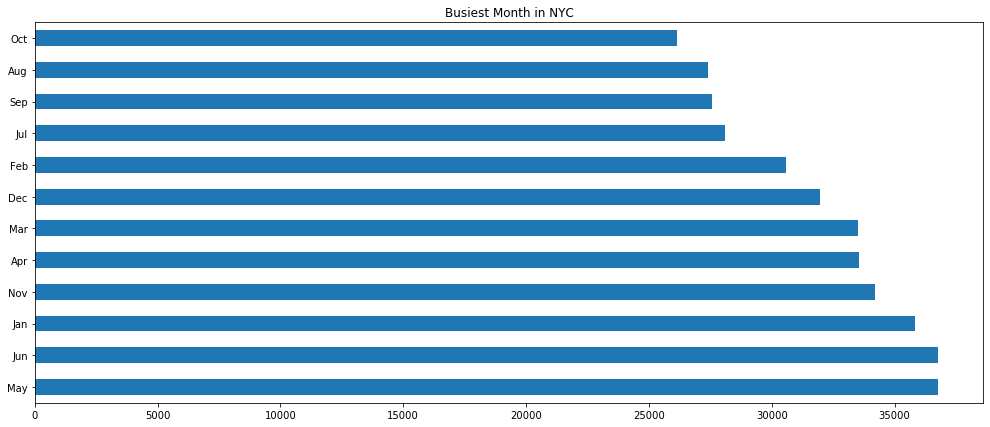

In [21]:
df['Month_open'].value_counts().plot(kind='barh',
                    figsize=(17,7), title = 'Busiest Month in NYC')

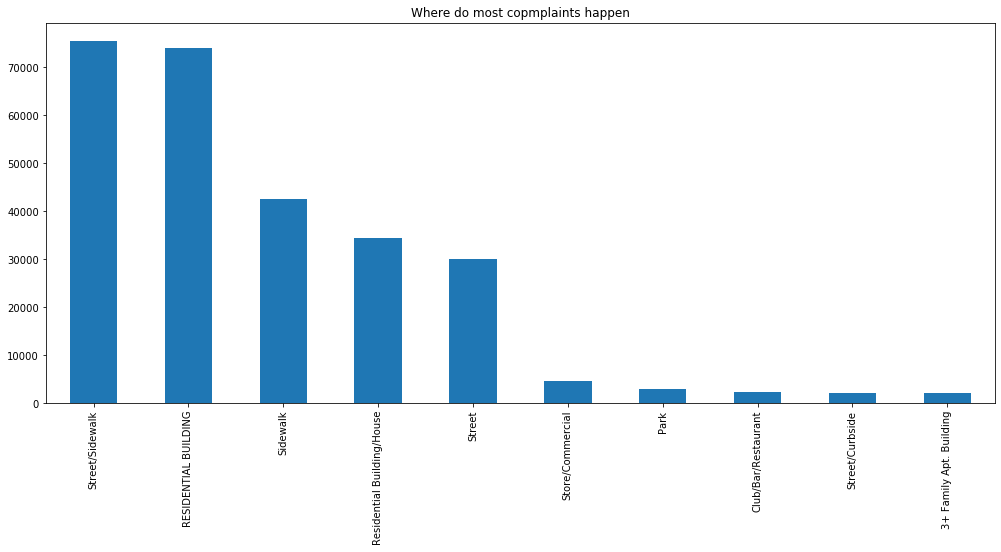

In [65]:
df['Location Type' ].value_counts().head(10).plot(kind='bar',
                    figsize=(17,7), title = 'Where do most copmplaints happen')

In [35]:
df_Brooklyn = df[df['Borough']=='BROOKLYN']

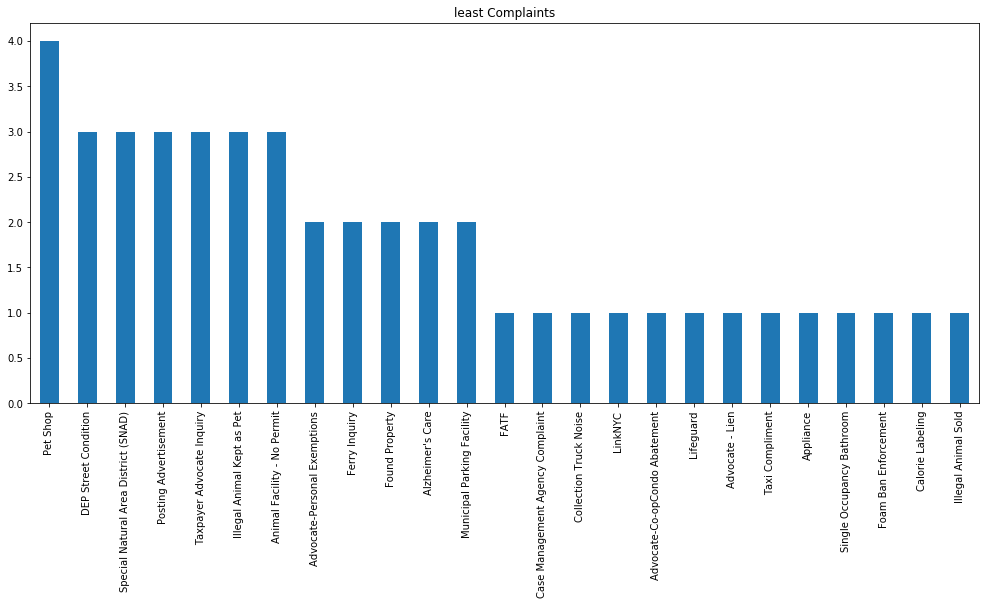

In [36]:
df_Brooklyn['Complaint Type'].value_counts().tail(25).plot(kind='bar',
                    figsize=(17,7), title = 'least Complaints')

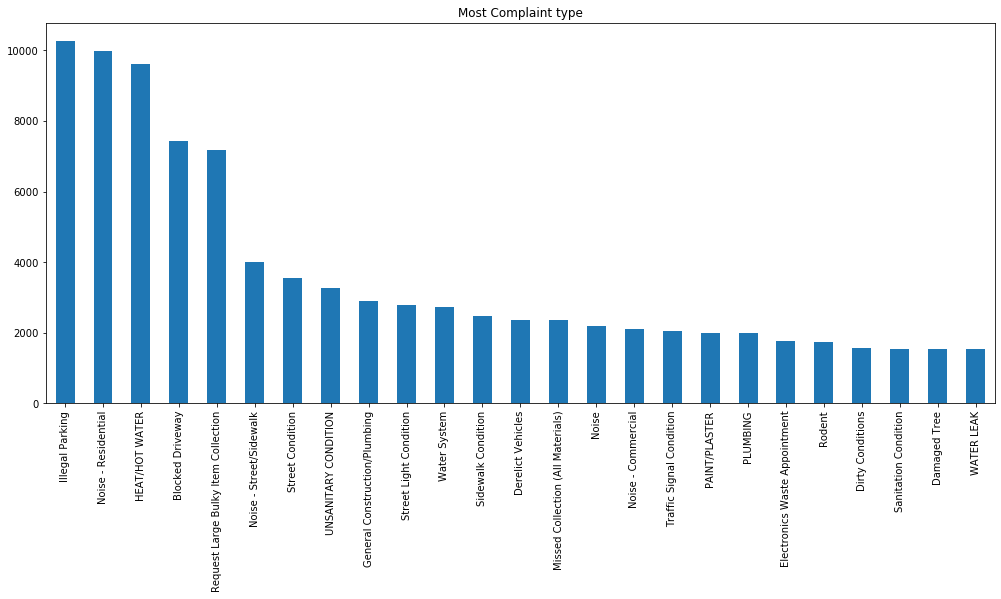

In [40]:
df_Brooklyn['Complaint Type'].value_counts().head(25).plot(kind='bar',
                    figsize=(17,7), title = 'Most Complaint type')

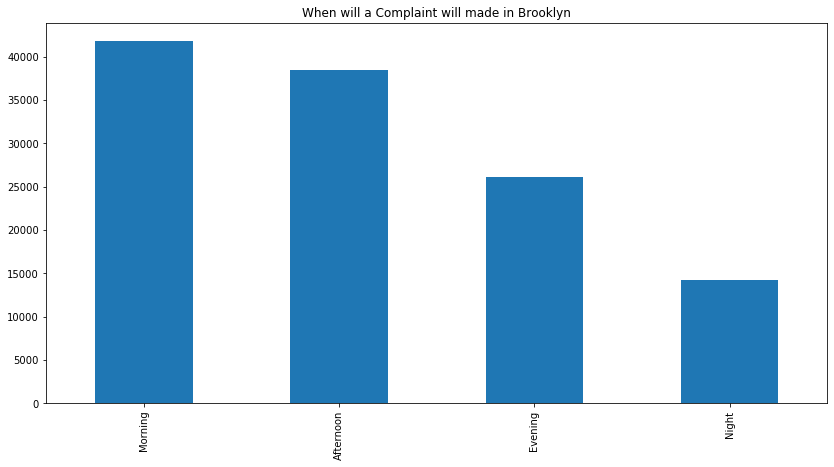

In [39]:
df_Brooklyn['Part of day open'].value_counts().head(25).plot(kind='bar',
                    figsize=(14,7), title = 'When will a Complaint will made in Brooklyn')

In [61]:
df_NYCPD=  df[df['Agency']=='NYPD']

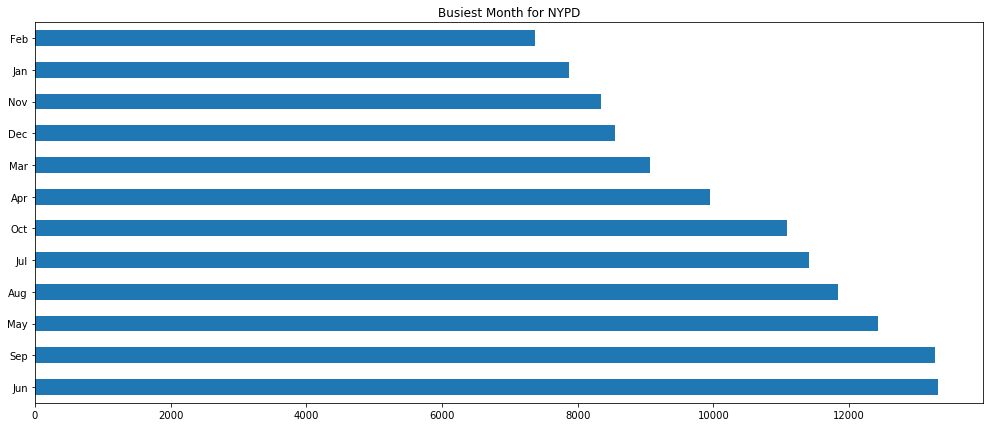

In [53]:
df_NYCPD['Month_open'].value_counts().plot(kind='barh',
                    figsize=(17,7), title = 'Busiest Month for NYPD')

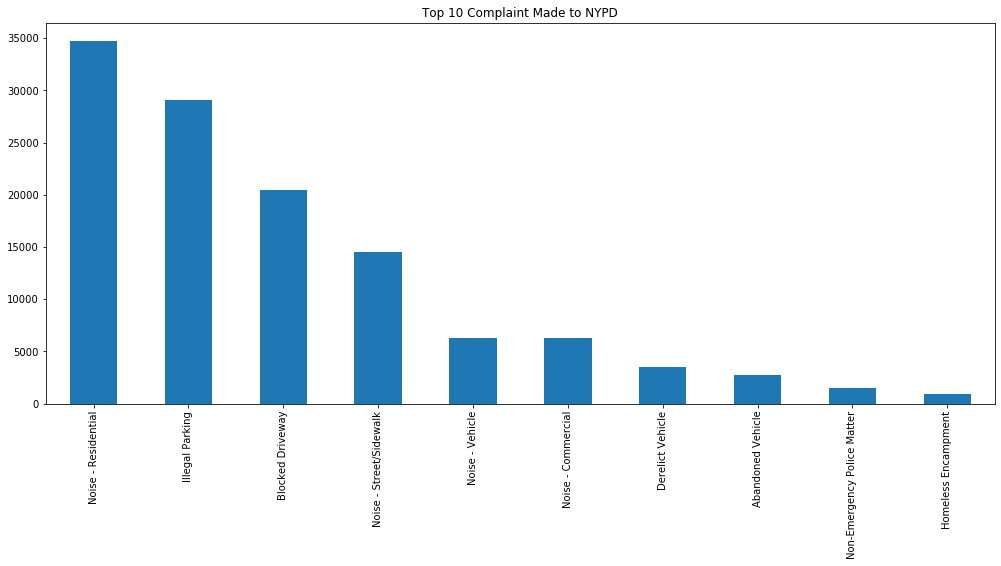

In [64]:
df_NYCPD['Complaint Type'].value_counts().head(10).plot(kind='bar',
                    figsize=(17,7), title = 'Top 10 Complaint Made to NYPD')

In [34]:
df_NYCPD['Days to Close a Complaint' ].groupby(df['Complaint Type' ]).mean()

Complaint Type
Abandoned Vehicle              1.699736
Animal Abuse                   1.042120
Animal-Abuse                   1.693587
Bike/Roller/Skate Chronic      1.010101
Blocked Driveway               1.191525
Derelict Vehicle               1.145263
Disorderly Youth               1.000000
Drinking                       1.186441
Drug Activity                  1.211594
Graffiti                       1.086207
Homeless Encampment            1.168966
Illegal Fireworks              1.535714
Illegal Parking                1.189725
Noise - Commercial             1.130941
Noise - House of Worship       1.017241
Noise - Park                   1.032423
Noise - Residential            1.088997
Noise - Street/Sidewalk        1.112548
Noise - Vehicle                1.080305
Non-Emergency Police Matter    1.297186
Panhandling                    1.007042
Posting Advertisement          1.000000
Traffic                        1.008108
Urinating in Public            1.152174
Vending                  

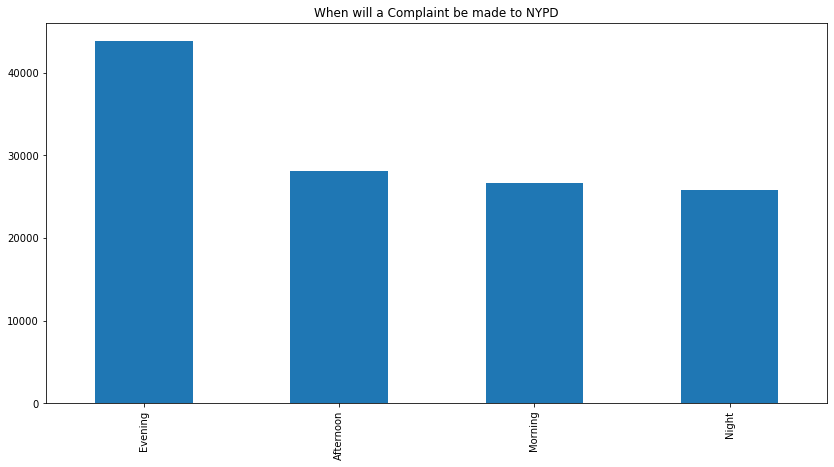

In [70]:
df_NYCPD['Part of day open'].value_counts().plot(kind='bar',
                    figsize=(14,7), title = 'When will a Complaint be made to NYPD')

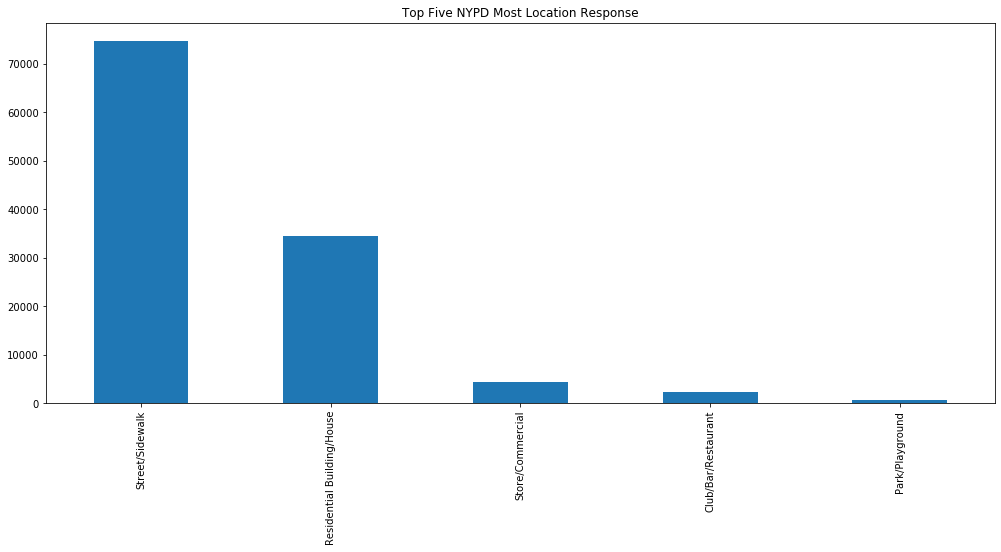

In [69]:
df_NYCPD['Location Type' ].value_counts().head(5).plot(kind='bar',
                    figsize=(17,7), title = 'Top Five NYPD Most Location Response')